1. Find the proportion of passengers in each class.
2. Count the number of passengers in each deck.
3. Plot a bar chart showing survival rates across different decks.
4. Determine the average fare for each embarkation point.
5. Calculate the survival rate for passengers with family size greater than 3.
6. Create a histogram of ages grouped by survival status.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [7]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
total_df = pd.merge(test_df,gender_df, on='PassengerId', how = 'inner')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


(418, 2)

In [49]:
embarkian_count = train_df['Embarked'].value_counts()
embarkian_count.head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
class_count = train_df['Pclass'].value_counts()
pclass_pro = class_count /class_count.sum()
print(f'{pclass_pro.round(4)}')

Pclass
3    0.5511
1    0.2424
2    0.2065
Name: count, dtype: float64


C:\Users\M R Mafi\AppData\Local\Temp\ipykernel_4144\3232712511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df,x='Survived', y='Embarked', palette='Blues')


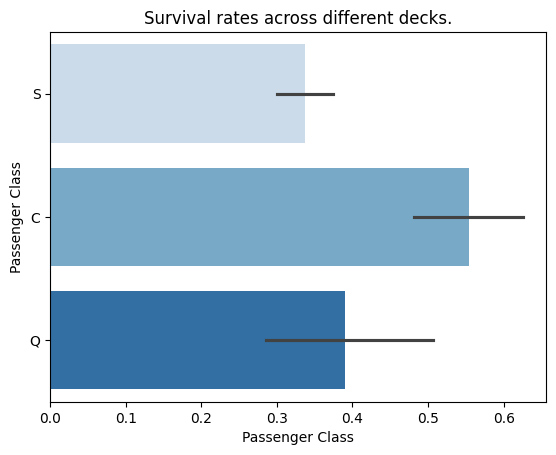

In [ ]:
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='Blues')
plt.title('Survival rates across different decks.')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rates')
plt.show()

In [55]:
fare_embarkation = (train_df
 .groupby("Embarked")
 .agg({'Fare':'sum'})
)
total_Embarkian_count = pd.merge(embarkian_count, fare_embarkation, on='Embarked', how='inner')
avg = total_Embarkian_count['Fare']/total_Embarkian_count['count']
print(avg)

Embarked
S    27.079812
C    59.954144
Q    13.276030
dtype: float64


In [23]:
train_df.shape

(891, 12)